# 실전 데이터 시각화

분석할 데이터를 읽고, matplotlib, seaborn, bokeh 등의 시각화 라이브러리를 사용하여 다양한 시각화 만들기

## 데이터 파일 읽기

In [70]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [71]:
cd gdrive

[Errno 2] No such file or directory: 'gdrive'
/content/gdrive/My Drive/6. Corona Virus Dataset


In [72]:
ls

datasets_527325_1205308_Case.csv
datasets_527325_1205308_PatientInfo.csv
datasets_527325_1205308_PatientRoute.csv
datasets_527325_1205308_Policy.csv
datasets_527325_1205308_Region.csv
datasets_527325_1205308_SearchTrend.csv
datasets_527325_1205308_TimeAge.csv
datasets_527325_1205308_Time.csv
datasets_527325_1205308_TimeGender.csv
datasets_527325_1205308_TimeProvince.csv
SeoulFloating.csv
Weather.csv


In [73]:
cd My Drive

[Errno 2] No such file or directory: 'My Drive'
/content/gdrive/My Drive/6. Corona Virus Dataset


In [74]:
ls

datasets_527325_1205308_Case.csv
datasets_527325_1205308_PatientInfo.csv
datasets_527325_1205308_PatientRoute.csv
datasets_527325_1205308_Policy.csv
datasets_527325_1205308_Region.csv
datasets_527325_1205308_SearchTrend.csv
datasets_527325_1205308_TimeAge.csv
datasets_527325_1205308_Time.csv
datasets_527325_1205308_TimeGender.csv
datasets_527325_1205308_TimeProvince.csv
SeoulFloating.csv
Weather.csv


In [75]:
cd 6. Corona Virus Dataset

[Errno 2] No such file or directory: '6. Corona Virus Dataset'
/content/gdrive/My Drive/6. Corona Virus Dataset


In [76]:
ls

datasets_527325_1205308_Case.csv
datasets_527325_1205308_PatientInfo.csv
datasets_527325_1205308_PatientRoute.csv
datasets_527325_1205308_Policy.csv
datasets_527325_1205308_Region.csv
datasets_527325_1205308_SearchTrend.csv
datasets_527325_1205308_TimeAge.csv
datasets_527325_1205308_Time.csv
datasets_527325_1205308_TimeGender.csv
datasets_527325_1205308_TimeProvince.csv
SeoulFloating.csv
Weather.csv


In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
Case = pd.read_csv("datasets_527325_1205308_Case.csv")

Patient_Info = pd.read_csv("datasets_527325_1205308_PatientInfo.csv")
Patient_Route = pd.read_csv("datasets_527325_1205308_PatientRoute.csv")
Policy = pd.read_csv("datasets_527325_1205308_Policy.csv")

Region = pd.read_csv("datasets_527325_1205308_Region.csv")
Search_Trend = pd.read_csv("datasets_527325_1205308_SearchTrend.csv")

Time_Age = pd.read_csv("datasets_527325_1205308_TimeAge.csv")
Time = pd.read_csv("datasets_527325_1205308_Time.csv")
Time_Gender = pd.read_csv("datasets_527325_1205308_TimeGender.csv")
Time_Province = pd.read_csv("datasets_527325_1205308_TimeProvince.csv")

Seoul_Floating = pd.read_csv("SeoulFloating.csv")
Weather = pd.read_csv("Weather.csv")

In [79]:
Case # 지역별/도시별/확진자수/감염장소/위도와 경도

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165
...,...,...,...,...,...,...,...,...
123,6100010,Gyeongsangnam-do,-,False,etc,19.0,-,-
124,7000001,Jeju-do,-,False,overseas inflow,10.0,-,-
125,7000002,Jeju-do,-,False,contact with patient,0.0,-,-
126,7000003,Jeju-do,-,False,etc,4.0,-,-


In [80]:
Dataset = {"Case" : Case , 
           "Patient_Info" : Patient_Info , 
           "Patient_Route" : Patient_Route , 
           "Policy" : Policy , 
           "Region" : Region, 
           "Search_Trend" : Search_Trend, 
           "Time_Age" : Time_Age, 
           "Time" : Time, 
           "Time_Gender" : Time_Gender, 
           "Time_Province" : Time_Province, 
           "Seoul_Floating" : Seoul_Floating, 
           "Weather" : Weather
           }


In [81]:
Dataset['Case']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165
...,...,...,...,...,...,...,...,...
123,6100010,Gyeongsangnam-do,-,False,etc,19.0,-,-
124,7000001,Jeju-do,-,False,overseas inflow,10.0,-,-
125,7000002,Jeju-do,-,False,contact with patient,0.0,-,-
126,7000003,Jeju-do,-,False,etc,4.0,-,-


## 다양한 데이터 시각화

In [82]:
import numpy as np
import pandas as pd
import json
import requests
import branca
import folium
folium.__version__

'0.8.3'

In [83]:
Patient_Info.head() # 환자번호/성별/생일/나이/지역,도시명/감염사례/

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [84]:
Patient_Route.head()  # 환자번호/확진날짜/확진지역,도시명 / 장소타입 / 위치좌표

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [85]:
Policy.head()  # 정책번호/지역명/타입/정부정책명/상세1/시작일자/끝난일자

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [86]:
Region.head() # 지역명/도시명/위치좌표/초등학교수/유치원수/대학교 숫자/학생 비율/노령인구비율/독거노인비율/요양원 수

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [87]:
import folium 

N = len(Dataset['Region'])

m = folium.Map(location = [37.5, 127], zoom_start = 9)
for i in range(10):
    if Case['latitude'][i] == '-' and Case['longitude'][i] == '-' :
        pass
    else:
    
        folium.Marker(
            location = [float(Case['latitude'][i]), float(Case['longitude'][i])],
            popup = "<b>" + Case['infection_case'][i] + "</b>",
            tooltip = "Click me!" 
            ).add_to(m)

m # 확진자들의 확진 위치 시각화


In [88]:
# 1. 다른 사람을 가장 많이 전염시킨 사람은?

Patient_Info['count'] = 1  # 행의 개수 세기 위해 count 컬럼 생성

In [89]:
top_infection = Patient_Info.groupby("infected_by").sum().sort_values('count', ascending = False)

top_infection.head()

,patient_id,global_num,infection_order,count
infected_by,,,,
2000000205,102000013838,430976.0,0.0,51
4100000008,110700000689,0.0,0.0,27
2000000167,48000006440,203371.0,0.0,24
4100000006,86100000921,0.0,0.0,21
2000000309,42000008913,197481.0,0.0,21


In [90]:
# 인덱스 새로 생성하기
top_infection = top_infection.reset_index()
top_infection.head()

,infected_by,patient_id,global_num,infection_order,count
0,2000000205,102000013838,430976.0,0.0,51
1,4100000008,110700000689,0.0,0.0,27
2,2000000167,48000006440,203371.0,0.0,24
3,4100000006,86100000921,0.0,0.0,21
4,2000000309,42000008913,197481.0,0.0,21


In [92]:
# 다른 사람과 가장 많이 접촉한 사람 알아보기
# contact_number로 정렬하여 확인
top_contacter = Patient_Info.sort_values('contact_number', ascending=False)
top_contacter.head(10)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,count
1478,2000000002,4.0,male,1964,50s,Korea,Gyeonggi-do,Pyeongtaek-si,NaN,overseas inflow,1.0,NaN,95,NaN,2020-01-27,2020-02-09,NaN,released,1
2628,6001000006,211.0,female,1974,40s,Korea,Gyeongsangbuk-do,Gyeongsan-si,NaN,NaN,NaN,NaN,9,NaN,2020-02-21,2020-03-14,NaN,released,1
1333,1500000002,372.0,female,NaN,60s,Korea,Daejeon,Yuseong-gu,NaN,etc,NaN,NaN,9,NaN,2020-02-22,2020-03-28,NaN,released,1
2078,2000000602,10395.0,female,1995,20s,Korea,Gyeonggi-do,Gunpo-si,NaN,overseas inflow,NaN,NaN,9,2020-03-29,2020-04-08,NaN,NaN,isolated,1
1846,2000000370,9091.0,male,1982,30s,Korea,Gyeonggi-do,Yongin-si,NaN,contact with patient,NaN,2000000371,9,NaN,2020-03-24,NaN,NaN,isolated,1
1834,2000000358,8988.0,female,1970,50s,Korea,Gyeonggi-do,Seongnam-si,NaN,contact with patient,NaN,2000000205,9,NaN,2020-03-23,NaN,NaN,isolated,1
2519,4100000083,NaN,female,1997,20s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4100000006,9,NaN,2020-03-04,2020-03-29,NaN,released,1
1467,1700000038,NaN,male,NaN,50s,Korea,Sejong,Sejong,NaN,Ministry of Oceans and Fisheries,NaN,NaN,9,2020-03-08,2020-03-13,2020-04-29,NaN,released,1
883,1100000021,NaN,female,2002,10s,Korea,Busan,Gangseo-gu,NaN,Onchun Church,NaN,NaN,9,NaN,2020-02-23,NaN,NaN,released,1
1448,1700000019,NaN,male,NaN,40s,Korea,Sejong,Sejong,NaN,Ministry of Oceans and Fisheries,NaN,NaN,9,2020-03-08,2020-04-22,2020-05-01,NaN,released,1


In [93]:
# 감염 사례별 확진자 수 알아보기
Case.head() # 감염 케이스에 대한 정보

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
1,1000002,Seoul,Guro-gu,True,Guro-gu Call Center,99.0,37.508163,126.884387
2,1000003,Seoul,Dongdaemun-gu,True,Dongan Church,20.0,37.592888,127.056766
3,1000004,Seoul,Guro-gu,True,Manmin Central Church,41.0,37.481059,126.894343
4,1000005,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14.0,37.63369,126.9165


In [94]:
# case를 confirmed로 정렬
Case.sort_values(by='confirmed', ascending=False).head(10)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
29,1200001,Daegu,Nam-gu,True,Shincheonji Church,4510.0,35.84008,128.5667
37,1200009,Daegu,-,False,contact with patient,920.0,-,-
38,1200010,Daegu,-,False,etc,737.0,-,-
102,6000001,Gyeongsangbuk-do,from other city,True,Shincheonji Church,566.0,-,-
16,1000017,Seoul,-,False,overseas inflow,346.0,-,-
75,2000010,Gyeonggi-do,-,False,overseas inflow,252.0,-,-
30,1200002,Daegu,Dalseong-gun,True,Second Mi-Ju Hospital,196.0,35.857375,128.466651
112,6000011,Gyeongsangbuk-do,-,False,contact with patient,190.0,-,-
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652
113,6000012,Gyeongsangbuk-do,-,False,etc,132.0,-,-


In [95]:
# case에서 신천지 감염 사례만 보기
Case[Case["infection_case"] == "Shincheonji Church"]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
12,1000013,Seoul,from other city,True,Shincheonji Church,8.0,-,-
20,1100002,Busan,from other city,True,Shincheonji Church,12.0,-,-
29,1200001,Daegu,Nam-gu,True,Shincheonji Church,4510.0,35.84008,128.5667
39,1300001,Gwangju,from other city,True,Shincheonji Church,9.0,-,-
46,1400004,Incheon,from other city,True,Shincheonji Church,2.0,-,-
51,1500002,Daejeon,from other city,True,Shincheonji Church,2.0,-,-
56,1600001,Ulsan,from other city,True,Shincheonji Church,16.0,-,-
62,1700003,Sejong,from other city,True,Shincheonji Church,1.0,-,-
70,2000005,Gyeonggi-do,from other city,True,Shincheonji Church,29.0,-,-
78,3000001,Gangwon-do,from other city,True,Shincheonji Church,17.0,-,-


In [96]:
# case를 infection_case로 묶어본다.
infection_cases = Case.groupby('infection_case').sum()
infection_cases = infection_cases.sort_values(by='confirmed', ascending=False)
infection_cases.head(10)
# 신천지 교회가 확진자가 가장 많은 그룹이다.

,case_id,group,confirmed
infection_case,,,
Shincheonji Church,42000039,15.0,5212.0
contact with patient,48100108,0.0,1236.0
etc,53100127,0.0,1068.0
overseas inflow,53100094,0.0,886.0
Itaewon Clubs,13700026,6.0,253.0
Second Mi-Ju Hospital,1200002,1.0,196.0
Guro-gu Call Center,4400008,3.0,167.0
Hansarang Convalescent Hospital,1200003,1.0,128.0
Cheongdo Daenam Hospital,8300016,3.0,123.0


In [97]:
Time_Age.tail() # 환자들의 연령대별 정보

,date,time,age,confirmed,deceased
814,2020-05-31,0,40s,1521,3
815,2020-05-31,0,50s,2039,15
816,2020-05-31,0,60s,1405,39
817,2020-05-31,0,70s,725,80
818,2020-05-31,0,80s,498,131


In [98]:
# 마지막 몇 개의 행만 자른다.
last_timeage = Time_Age[-9:]
last_timeage

,date,time,age,confirmed,deceased
810,2020-05-31,0,0s,157,0
811,2020-05-31,0,10s,655,0
812,2020-05-31,0,20s,3176,0
813,2020-05-31,0,30s,1292,2
814,2020-05-31,0,40s,1521,3
815,2020-05-31,0,50s,2039,15
816,2020-05-31,0,60s,1405,39
817,2020-05-31,0,70s,725,80
818,2020-05-31,0,80s,498,131


In [99]:
# deceased / confirmed로 치사율 컬럼 생성
last_timeage["mortality"] = round(last_timeage["deceased"] / last_timeage["confirmed"] * 100, 2)
last_timeage

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,time,age,confirmed,deceased,mortality
810,2020-05-31,0,0s,157,0,0.00
811,2020-05-31,0,10s,655,0,0.00
812,2020-05-31,0,20s,3176,0,0.00
813,2020-05-31,0,30s,1292,2,0.15
814,2020-05-31,0,40s,1521,3,0.20
815,2020-05-31,0,50s,2039,15,0.74
816,2020-05-31,0,60s,1405,39,2.78
817,2020-05-31,0,70s,725,80,11.03
818,2020-05-31,0,80s,498,131,26.31


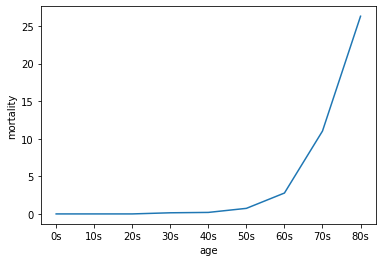

In [100]:
# 그래프 그려보기 : 80대로 올라갈수록 치사율이 상승한다.
sns.lineplot(data=last_timeage, x='age', y='mortality')
plt.show()

In [101]:
# 연령에 따른 확진자 및 완치 비율을 알고 싶으므로
# state가 released인 데이터만 모아서 본다.
released = Patient_Info[Patient_Info["state"] == "released"]
print(released.shape)
released.head()

(2340, 19)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,count
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,1
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,1
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,1
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,1
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,1


In [102]:
# 위 데이터를 age로 묶어서 몇명인지 세 본다.
release_count = released.groupby('age').sum()
release_count['release_count'] = release_count["count"]
release_count

,patient_id,global_num,infection_order,count,release_count
age,,,,,
0s,110702004965,99046.0,0.0,31,31
100s,6001000503,7739.0,0.0,1,1
10s,393404018518,406500.0,0.0,108,108
20s,2305127107521,2524408.0,8.0,608,608
30s,960808045525,1202217.0,8.0,310,310
40s,1163113046773,1186436.0,10.0,338,338
50s,1535303070647,1692127.0,9.0,414,414
60s,1023855036116,821737.0,9.0,243,243
70s,445994026075,488261.0,14.0,110,110


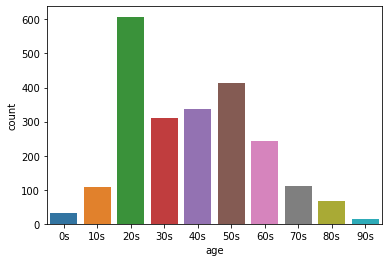

In [103]:
# 20대 완치자 수가 가장 많은 것으로 보인다.
sns.countplot(data=released, x='age', 
              order=['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'])
plt.show()

In [104]:
# 확진자들의 연령 분포를 확인하기 위해 Patient_Info를
# age로 묶어서 confirm_count 라는 새로운 컬럼 생성
confirm_count = Patient_Info.groupby('age').sum()
confirm_count["confirm_count"] = confirm_count["count"]
confirm_count

,patient_id,global_num,infection_order,count,confirm_count
age,,,,,
0s,197662012785,254718.0,0.0,60,60
100s,6001000503,7739.0,0.0,1,1
10s,572572030160,665258.0,0.0,160,160
20s,2953533197613,4282085.0,8.0,860,860
30,2000000791,11320.0,0.0,1,1
30s,1392760117237,2566958.0,8.0,493,493
40s,1591159086496,2015218.0,10.0,483,483
50s,2137815535334,2965006.0,10.0,625,625
60s,1623790389259,1709021.0,15.0,423,423


In [105]:
# 완치된 사람들의 수
release_count['release_count']

age
0s       31
100s      1
10s     108
20s     608
30s     310
40s     338
50s     414
60s     243
70s     110
80s      68
90s      15
Name: release_count, dtype: int64

In [106]:
# 확진된 사람들의 수
confirm_count["confirm_count"]

age
0s       60
100s      1
10s     160
20s     860
30        1
30s     493
40s     483
50s     625
60s     423
70s     210
80s     162
90s      47
Name: confirm_count, dtype: int64

In [107]:
# concat 명령어로 위의 두 표를 붙이고, 가로로 붙이므로 axis = 1
age_count = pd.concat([release_count['release_count'], 
                       confirm_count["confirm_count"]], axis=1).fillna(0).astype('int64')
age_count

,release_count,confirm_count
0s,31,60
100s,1,1
10s,108,160
20s,608,860
30s,310,493
40s,338,483
50s,414,625
60s,243,423
70s,110,210
80s,68,162


In [108]:
# 완치율을 의미하는 release_rate 컬럼 생성
age_count["release_rate"] = round(age_count["release_count"] / age_count["confirm_count"] * 100, 2)
age_count

,release_count,confirm_count,release_rate
0s,31,60,51.67
100s,1,1,100.00
10s,108,160,67.50
20s,608,860,70.70
30s,310,493,62.88
40s,338,483,69.98
50s,414,625,66.24
60s,243,423,57.45
70s,110,210,52.38
80s,68,162,41.98


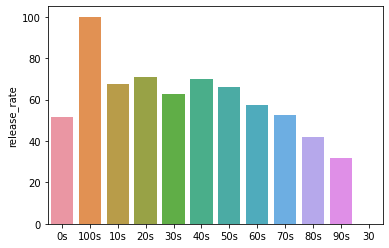

In [109]:
# 그래프로 그려보기
sns.barplot(data=age_count, x=age_count.index, y='release_rate')
plt.show()

## 인터랙티브 데이터 시각화